In [3]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [ ]:
cross = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第九次作业\TRD_Mnth202509.csv')
from pandas.tseries.offsets import MonthEnd#调用该数据的内容

In [10]:
# 处理月份格式
cross['month'] = pd.to_datetime(cross['Trdmnt'], format='%Y-%m') + MonthEnd(1)
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: str(x).zfill(6)) # 6位股票代码
# 重命名列以匹配后续代码
cross.rename(columns={'Mretwd': 'Return', 'Msmvosd': 'floatingvalue', 'Msmvttl': 'totalvalue'}, inplace=True)

# 导入无风险利率数据
rf_data = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第九次作业\Marketret_mon_stock2024.csv')
# 处理月份格式
rf_data['month'] = pd.to_datetime(rf_data['month'], format='%b %Y') + MonthEnd(1)
# 只保留需要的列
rf_data = rf_data[['month', 'rfmonth']]

# 合并无风险利率到cross
cross = pd.merge(cross, rf_data, on='month', how='left')

# 计算超额收益率
cross['ret'] = cross['Return'] - cross['rfmonth']
cross['floatingvalue'] = cross['floatingvalue'] * 1000
cross['totalvalue'] = cross['totalvalue'] * 1000
cross

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth_x,ret,rfmonth_y,rfmonth
0,000001,1991-04,3,49.00,30,43.68,13400,6.150000e+05,1.157520e+09,2.118487e+09,20,NaN,NaN,4,1991-04-03,NaN,NaN,1991-04-30,0.006651,NaN,0.006651,0.006651
1,000001,1991-05,2,43.46,31,38.34,187800,7.675000e+06,1.016010e+09,1.859497e+09,24,-0.122253,0.235714,4,1991-04-03,NaN,NaN,1991-05-31,0.006092,-0.128345,0.006092,0.006092
2,000001,1991-06,1,38.53,28,33.99,30600,1.094000e+06,9.007350e+08,1.648521e+09,23,-0.113459,-0.113459,4,1991-04-03,NaN,NaN,1991-06-30,0.006092,-0.119551,0.006092,0.006092
3,000001,1991-07,1,33.65,31,29.54,6100,1.940430e+05,7.828100e+08,1.432695e+09,16,-0.130921,-0.130921,4,1991-04-03,NaN,NaN,1991-07-31,0.006092,-0.137013,0.006092,0.006092
4,000001,1991-08,1,29.39,31,15.00,3243100,4.957624e+07,6.748338e+08,1.346275e+09,15,-0.411588,-0.411587,4,1991-08-01,NaN,NaN,1991-08-31,0.006092,-0.417680,0.006092,0.006092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886908,920992,2025-05,6,20.00,30,20.46,92609592,1.922463e+09,5.707967e+08,1.979115e+09,19,0.051312,0.051715,64,2023-04-25,0.0,0.0,2025-05-31,NaN,NaN,NaN,NaN
886909,920992,2025-06,3,20.40,30,21.26,73152031,1.580767e+09,5.931152e+08,2.056500e+09,20,0.039101,0.039101,64,2023-04-25,0.0,0.0,2025-06-30,NaN,NaN,NaN,NaN
886910,920992,2025-07,1,21.13,31,22.44,96064221,2.126994e+09,6.260351e+08,2.170642e+09,23,0.055503,0.055503,64,2023-04-25,0.0,0.0,2025-07-31,NaN,NaN,NaN,NaN
886911,920992,2025-08,1,22.12,29,21.65,63953451,1.432608e+09,6.039955e+08,2.094225e+09,21,-0.035205,-0.035205,64,2023-04-25,0.0,0.0,2025-08-31,NaN,NaN,NaN,NaN


In [11]:
all_months = pd.DataFrame(cross['month'].unique(), columns=['month'])
all_stocks = pd.DataFrame(cross['Stkcd'].unique(), columns=['Stkcd'])
# 创建笛卡尔积 - 所有股票和所有月份的组合
full_index = pd.merge(all_stocks.assign(key=1), all_months.assign(key=1), on='key').drop('key', axis=1)
cross_full = full_index.merge(cross, on=['Stkcd', 'month'], how='left')

# 按股票代码和月份排序
cross_full = cross_full.sort_values(['Stkcd', 'month'])

# 使用shift生成下月收益率
cross_full['next_ret_method1'] = cross_full.groupby('Stkcd')['ret'].shift(-1)

# 只保留原始数据存在的行
cross = cross.merge(
    cross_full[['Stkcd', 'month', 'next_ret_method1']],
    on=['Stkcd', 'month'],
    how='left'
)

print("方法1完成：补全日期序列后使用shift")
cross[['Stkcd', 'month', 'ret', 'next_ret_method1']].head(28)


方法1完成：补全日期序列后使用shift


,Stkcd,month,ret,next_ret_method1
0,000001,1991-04-30,NaN,-0.128345
1,000001,1991-05-31,-0.128345,-0.119551
2,000001,1991-06-30,-0.119551,-0.137013
3,000001,1991-07-31,-0.137013,-0.417680
4,000001,1991-08-31,-0.417680,-0.039425
5,000001,1991-09-30,-0.039425,0.849080
6,000001,1991-10-31,0.849080,0.016213
7,000001,1991-11-30,0.016213,0.061181
8,000001,1991-12-31,0.061181,0.055237
9,000001,1992-01-31,0.055237,0.006749


In [12]:
# 方法2：截取个股收益率数据，日期减一个月，重命名后合并回去
# 创建下月收益率数据
next_ret_data = cross[['Stkcd', 'month', 'ret']].copy()

# 月份加一个月（将当前月份加一个月，使得能匹配到下月的收益率）
# 为了获取下月收益率，需要将月份加一个月
next_ret_data['month'] = next_ret_data['month'] - MonthEnd(1)  
# 重命名收益率列
next_ret_data.rename(columns={'ret': 'next_ret_method2'}, inplace=True)
# 合并回原数据
cross = cross.merge(next_ret_data, on=['Stkcd', 'month'], how='left')
print("方法2完成：日期减一个月后合并")
cross[['Stkcd', 'month', 'ret', 'next_ret_method1', 'next_ret_method2']].head(28)

方法2完成：日期减一个月后合并


,Stkcd,month,ret,next_ret_method1,next_ret_method2
0,000001,1991-04-30,NaN,-0.128345,-0.128345
1,000001,1991-05-31,-0.128345,-0.119551,-0.119551
2,000001,1991-06-30,-0.119551,-0.137013,-0.137013
3,000001,1991-07-31,-0.137013,-0.417680,-0.417680
4,000001,1991-08-31,-0.417680,-0.039425,-0.039425
5,000001,1991-09-30,-0.039425,0.849080,0.849080
6,000001,1991-10-31,0.849080,0.016213,0.016213
7,000001,1991-11-30,0.016213,0.061181,0.061181
8,000001,1991-12-31,0.061181,0.055237,0.055237
9,000001,1992-01-31,0.055237,0.006749,0.006749


In [13]:
# 验证两种方法的结果是否一致
comparison = cross[['Stkcd', 'month', 'ret', 'next_ret_method1', 'next_ret_method2']].copy()
comparison['difference'] = comparison['next_ret_method1'] - comparison['next_ret_method2']

print("两种方法的差异统计：")
print(comparison['difference'].describe())
print(f"\n完全一致的记录数: {(comparison['difference'].abs() < 1e-10).sum()}")
print(f"总记录数: {len(comparison)}")

# 使用方法2的结果作为最终的next_ret
cross['next_ret'] = cross['next_ret_method2']
# 删除临时列
cross.drop(['next_ret_method1', 'next_ret_method2'], axis=1, inplace=True)

cross

两种方法的差异统计：
count    827102.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: difference, dtype: float64

完全一致的记录数: 827102
总记录数: 886913


,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth_x,ret,rfmonth_y,rfmonth,next_ret
0,000001,1991-04,3,49.00,30,43.68,13400,6.150000e+05,1.157520e+09,2.118487e+09,20,NaN,NaN,4,1991-04-03,NaN,NaN,1991-04-30,0.006651,NaN,0.006651,0.006651,-0.128345
1,000001,1991-05,2,43.46,31,38.34,187800,7.675000e+06,1.016010e+09,1.859497e+09,24,-0.122253,0.235714,4,1991-04-03,NaN,NaN,1991-05-31,0.006092,-0.128345,0.006092,0.006092,-0.119551
2,000001,1991-06,1,38.53,28,33.99,30600,1.094000e+06,9.007350e+08,1.648521e+09,23,-0.113459,-0.113459,4,1991-04-03,NaN,NaN,1991-06-30,0.006092,-0.119551,0.006092,0.006092,-0.137013
3,000001,1991-07,1,33.65,31,29.54,6100,1.940430e+05,7.828100e+08,1.432695e+09,16,-0.130921,-0.130921,4,1991-04-03,NaN,NaN,1991-07-31,0.006092,-0.137013,0.006092,0.006092,-0.417680
4,000001,1991-08,1,29.39,31,15.00,3243100,4.957624e+07,6.748338e+08,1.346275e+09,15,-0.411588,-0.411587,4,1991-08-01,NaN,NaN,1991-08-31,0.006092,-0.417680,0.006092,0.006092,-0.039425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886908,920992,2025-05,6,20.00,30,20.46,92609592,1.922463e+09,5.707967e+08,1.979115e+09,19,0.051312,0.051715,64,2023-04-25,0.0,0.0,2025-05-31,NaN,NaN,NaN,NaN,NaN
886909,920992,2025-06,3,20.40,30,21.26,73152031,1.580767e+09,5.931152e+08,2.056500e+09,20,0.039101,0.039101,64,2023-04-25,0.0,0.0,2025-06-30,NaN,NaN,NaN,NaN,NaN
886910,920992,2025-07,1,21.13,31,22.44,96064221,2.126994e+09,6.260351e+08,2.170642e+09,23,0.055503,0.055503,64,2023-04-25,0.0,0.0,2025-07-31,NaN,NaN,NaN,NaN,NaN
886911,920992,2025-08,1,22.12,29,21.65,63953451,1.432608e+09,6.039955e+08,2.094225e+09,21,-0.035205,-0.035205,64,2023-04-25,0.0,0.0,2025-08-31,NaN,NaN,NaN,NaN,NaN


In [14]:
#单拿出来某几项
fenweishu = pd.DataFrame(
    cross[cross['ret'].notna()].groupby(['month'])['ret'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu

ret
month                   
1991-01-31 0.1 -0.002031
           0.2  0.002868
           0.3  0.006672
           0.4  0.010476
           0.5  0.022318
...                  ...
2024-12-31 0.5 -0.064220
           0.6 -0.041659
           0.7 -0.017765
           0.8  0.016086
           0.9  0.079173

[3672 rows x 1 columns]

In [15]:
fenweishu = fenweishu.reset_index()
fenweishu

,month,level_1,ret
0,1991-01-31,0.1,-0.002031
1,1991-01-31,0.2,0.002868
2,1991-01-31,0.3,0.006672
3,1991-01-31,0.4,0.010476
4,1991-01-31,0.5,0.022318
...,...,...,...
3667,2024-12-31,0.5,-0.064220
3668,2024-12-31,0.6,-0.041659
3669,2024-12-31,0.7,-0.017765
3670,2024-12-31,0.8,0.016086


In [16]:
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='ret')
fenweishu

level_1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
month,,,,,,,,,
1991-01-31,-0.002031,0.002868,0.006672,0.010476,0.022318,0.034159,0.044819,0.055479,0.068586
1991-02-28,-0.042360,-0.037753,-0.012489,0.005470,0.019315,0.030097,0.034615,0.046888,0.081973
1991-03-31,-0.133314,-0.133261,-0.127661,-0.092379,-0.069798,-0.065144,-0.054707,-0.030694,0.028608
1991-04-30,-0.124371,-0.122867,-0.109328,-0.100079,-0.087628,-0.046745,0.020729,0.073833,0.090508
1991-05-31,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.132346,-0.099792,-0.078067,-0.059812,-0.044767,-0.028750,-0.012678,0.009087,0.051522
2024-09-30,0.121100,0.152297,0.172952,0.191662,0.210420,0.233569,0.262017,0.297110,0.367056
2024-10-31,-0.075368,-0.042757,-0.017695,0.006598,0.030677,0.057335,0.100766,0.170731,0.316122


In [17]:
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-31,-0.002031,0.002868,0.006672,0.010476,0.022318,0.034159,0.044819,0.055479,0.068586
1991-02-28,-0.042360,-0.037753,-0.012489,0.005470,0.019315,0.030097,0.034615,0.046888,0.081973
1991-03-31,-0.133314,-0.133261,-0.127661,-0.092379,-0.069798,-0.065144,-0.054707,-0.030694,0.028608
1991-04-30,-0.124371,-0.122867,-0.109328,-0.100079,-0.087628,-0.046745,0.020729,0.073833,0.090508
1991-05-31,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.132346,-0.099792,-0.078067,-0.059812,-0.044767,-0.028750,-0.012678,0.009087,0.051522
2024-09-30,0.121100,0.152297,0.172952,0.191662,0.210420,0.233569,0.262017,0.297110,0.367056
2024-10-31,-0.075368,-0.042757,-0.017695,0.006598,0.030677,0.057335,0.100766,0.170731,0.316122


In [18]:
portfolio = pd.merge(cross,fenweishu,on='month',how='left')
portfolio = portfolio.dropna(subset=['ret','next_ret'])
portfolio

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth_x,ret,rfmonth_y,rfmonth,next_ret,one,two,three,four,five,six,seven,eight,nine
1,000001,1991-05,2,43.46,31,38.34,187800,7.675000e+06,1.016010e+09,1.859497e+09,24,-0.122253,0.235714,4,1991-04-03,NaN,NaN,1991-05-31,0.006092,-0.128345,0.006092,0.006092,-0.119551,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
2,000001,1991-06,1,38.53,28,33.99,30600,1.094000e+06,9.007350e+08,1.648521e+09,23,-0.113459,-0.113459,4,1991-04-03,NaN,NaN,1991-06-30,0.006092,-0.119551,0.006092,0.006092,-0.137013,-0.309901,-0.119551,-0.115097,0.166237,0.177858,0.184748,0.190006,0.190283,0.201980
3,000001,1991-07,1,33.65,31,29.54,6100,1.940430e+05,7.828100e+08,1.432695e+09,16,-0.130921,-0.130921,4,1991-04-03,NaN,NaN,1991-07-31,0.006092,-0.137013,0.006092,0.006092,-0.417680,-0.244184,-0.128701,-0.086966,-0.052277,0.007620,0.067451,0.149691,0.216426,0.246553
4,000001,1991-08,1,29.39,31,15.00,3243100,4.957624e+07,6.748338e+08,1.346275e+09,15,-0.411588,-0.411587,4,1991-08-01,NaN,NaN,1991-08-31,0.006092,-0.417680,0.006092,0.006092,-0.039425,-0.161430,-0.110028,-0.049934,-0.014296,0.018298,0.060859,0.219168,0.233226,0.238218
5,000001,1991-09,2,15.00,28,14.50,7240500,1.027070e+08,6.523394e+08,1.301399e+09,24,-0.033333,-0.033333,4,1991-08-01,NaN,NaN,1991-09-30,0.006092,-0.039425,0.006092,0.006092,0.849080,-0.118675,-0.067377,-0.053691,-0.041891,-0.030783,-0.018184,0.055164,0.175783,0.190067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886898,920992,2024-07,1,8.56,31,8.51,20489257,1.733678e+08,2.374135e+08,8.231802e+08,23,-0.010465,-0.010465,64,2023-04-25,0.0,0.0,2024-07-31,0.001184,-0.011649,0.001184,0.001184,-0.038721,-0.095137,-0.058535,-0.034114,-0.015179,0.001936,0.018424,0.036850,0.061316,0.111595
886899,920992,2024-08,1,8.50,30,8.19,14436632,1.185912e+08,2.284861e+08,7.922264e+08,22,-0.037603,-0.037603,64,2023-04-25,0.0,0.0,2024-08-31,0.001118,-0.038721,0.001118,0.001118,0.276049,-0.132346,-0.099792,-0.078067,-0.059812,-0.044767,-0.028750,-0.012678,0.009087,0.051522
886900,920992,2024-09,2,8.15,30,10.46,18109819,1.566140e+08,2.918149e+08,1.011806e+09,19,0.277167,0.277167,64,2023-04-25,0.0,0.0,2024-09-30,0.001118,0.276049,0.001118,0.001118,0.389895,0.121100,0.152297,0.172952,0.191662,0.210420,0.233569,0.262017,0.297110,0.367056
886901,920992,2024-10,8,13.02,31,14.55,86774237,1.145494e+09,4.059185e+08,1.407435e+09,18,0.391013,0.391013,64,2023-04-25,0.0,0.0,2024-10-31,0.001118,0.389895,0.001118,0.001118,0.241494,-0.075368,-0.042757,-0.017695,0.006598,0.030677,0.057335,0.100766,0.170731,0.316122


In [19]:
# 根据收益率分位数将股票分配到不同的投资组合
# 使用np.where进行条件判断，根据ret列与各个分位数的比较结果分配组合标签

portfolio['sort'] = np.where(
    portfolio['ret'] <= portfolio['one'], 'P1',  # 收益率 <= 10%分位数 -> P1组（最低收益率组）
    np.where(
        portfolio['ret'] <= portfolio['two'], 'P2',  # 收益率 <= 20%分位数 -> P2组
        np.where(
            portfolio['ret'] <= portfolio['three'], 'P3',  # 收益率 <= 30%分位数 -> P3组
            np.where(
                portfolio['ret'] <= portfolio['four'], 'P4',  # 收益率 <= 40%分位数 -> P4组
                np.where(
                    portfolio['ret'] <= portfolio['five'], 'P5',  # 收益率 <= 50%分位数 -> P5组
                    np.where(
                        portfolio['ret'] <= portfolio['six'], 'P6',  # 收益率 <= 60%分位数 -> P6组
                        np.where(
                            portfolio['ret'] <= portfolio['seven'], 'P7',  # 收益率 <= 70%分位数 -> P7组
                            np.where(
                                portfolio['ret'] <= portfolio['eight'], 'P8',  # 收益率 <= 80%分位数 -> P8组
                                np.where(
                                    portfolio['ret'] <= portfolio['nine'], 'P9',  # 收益率 <= 90%分位数 -> P9组
                                    'Pmax'  # 收益率 > 90%分位数 -> Pmax组（最高收益率组）
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

portfolio

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth_x,ret,rfmonth_y,rfmonth,next_ret,one,two,three,four,five,six,seven,eight,nine,sort
1,000001,1991-05,2,43.46,31,38.34,187800,7.675000e+06,1.016010e+09,1.859497e+09,24,-0.122253,0.235714,4,1991-04-03,NaN,NaN,1991-05-31,0.006092,-0.128345,0.006092,0.006092,-0.119551,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117,P2
2,000001,1991-06,1,38.53,28,33.99,30600,1.094000e+06,9.007350e+08,1.648521e+09,23,-0.113459,-0.113459,4,1991-04-03,NaN,NaN,1991-06-30,0.006092,-0.119551,0.006092,0.006092,-0.137013,-0.309901,-0.119551,-0.115097,0.166237,0.177858,0.184748,0.190006,0.190283,0.201980,P2
3,000001,1991-07,1,33.65,31,29.54,6100,1.940430e+05,7.828100e+08,1.432695e+09,16,-0.130921,-0.130921,4,1991-04-03,NaN,NaN,1991-07-31,0.006092,-0.137013,0.006092,0.006092,-0.417680,-0.244184,-0.128701,-0.086966,-0.052277,0.007620,0.067451,0.149691,0.216426,0.246553,P2
4,000001,1991-08,1,29.39,31,15.00,3243100,4.957624e+07,6.748338e+08,1.346275e+09,15,-0.411588,-0.411587,4,1991-08-01,NaN,NaN,1991-08-31,0.006092,-0.417680,0.006092,0.006092,-0.039425,-0.161430,-0.110028,-0.049934,-0.014296,0.018298,0.060859,0.219168,0.233226,0.238218,P1
5,000001,1991-09,2,15.00,28,14.50,7240500,1.027070e+08,6.523394e+08,1.301399e+09,24,-0.033333,-0.033333,4,1991-08-01,NaN,NaN,1991-09-30,0.006092,-0.039425,0.006092,0.006092,0.849080,-0.118675,-0.067377,-0.053691,-0.041891,-0.030783,-0.018184,0.055164,0.175783,0.190067,P5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886898,920992,2024-07,1,8.56,31,8.51,20489257,1.733678e+08,2.374135e+08,8.231802e+08,23,-0.010465,-0.010465,64,2023-04-25,0.0,0.0,2024-07-31,0.001184,-0.011649,0.001184,0.001184,-0.038721,-0.095137,-0.058535,-0.034114,-0.015179,0.001936,0.018424,0.036850,0.061316,0.111595,P5
886899,920992,2024-08,1,8.50,30,8.19,14436632,1.185912e+08,2.284861e+08,7.922264e+08,22,-0.037603,-0.037603,64,2023-04-25,0.0,0.0,2024-08-31,0.001118,-0.038721,0.001118,0.001118,0.276049,-0.132346,-0.099792,-0.078067,-0.059812,-0.044767,-0.028750,-0.012678,0.009087,0.051522,P6
886900,920992,2024-09,2,8.15,30,10.46,18109819,1.566140e+08,2.918149e+08,1.011806e+09,19,0.277167,0.277167,64,2023-04-25,0.0,0.0,2024-09-30,0.001118,0.276049,0.001118,0.001118,0.389895,0.121100,0.152297,0.172952,0.191662,0.210420,0.233569,0.262017,0.297110,0.367056,P8
886901,920992,2024-10,8,13.02,31,14.55,86774237,1.145494e+09,4.059185e+08,1.407435e+09,18,0.391013,0.391013,64,2023-04-25,0.0,0.0,2024-10-31,0.001118,0.389895,0.001118,0.001118,0.241494,-0.075368,-0.042757,-0.017695,0.006598,0.030677,0.057335,0.100766,0.170731,0.316122,Pmax


In [22]:

portfolio_mom = pd.DataFrame(
    portfolio.groupby(['month', 'sort'], group_keys=False).apply(
        lambda x: np.average(x['next_ret'], weights=x['floatingvalue'])
    )
)
portfolio_mom

0
month      sort          
1991-01-31 P1   -0.041567
           P2    0.010496
           P4    0.038284
           P6    0.081305
           P8    0.028134
...                   ...
2024-11-30 P6    0.013224
           P7   -0.014391
           P8   -0.039313
           P9   -0.063706
           Pmax -0.075116

[4066 rows x 1 columns]

In [23]:
portfolio_mom = portfolio_mom.reset_index()
portfolio_mom.columns = ['month', 'sort', 'p']
portfolio_mom

,month,sort,p
0,1991-01-31,P1,-0.041567
1,1991-01-31,P2,0.010496
2,1991-01-31,P4,0.038284
3,1991-01-31,P6,0.081305
4,1991-01-31,P8,0.028134
...,...,...,...
4061,2024-11-30,P6,0.013224
4062,2024-11-30,P7,-0.014391
4063,2024-11-30,P8,-0.039313
4064,2024-11-30,P9,-0.063706


In [24]:
# 月份加一个月（将投资组合收益率对齐到实际的月份）
# 因为之前计算的是当前月份分组后下个月的收益率，需要将月份标记向后移动一个月
portfolio_mom['month'] = portfolio_mom['month'] + MonthEnd(1)

# 删除缺失值（删除没有下月收益率的记录）
portfolio_mom = portfolio_mom.dropna()

portfolio_mom

,month,sort,p
0,1991-02-28,P1,-0.041567
1,1991-02-28,P2,0.010496
2,1991-02-28,P4,0.038284
3,1991-02-28,P6,0.081305
4,1991-02-28,P8,0.028134
...,...,...,...
4061,2024-12-31,P6,0.013224
4062,2024-12-31,P7,-0.014391
4063,2024-12-31,P8,-0.039313
4064,2024-12-31,P9,-0.063706


In [26]:
portfolio_mom = portfolio_mom.pivot_table(index='month',
                                                    columns='sort',
                                                    values='p')
# long lowest return stocks and short highest return stocks
portfolio_mom['My_portfolio'] = portfolio_mom['P1'] - portfolio_mom['Pmax']
portfolio_mom

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-02-28,-0.041567,0.010496,NaN,0.038284,NaN,0.081305,NaN,0.028134,NaN,-0.002070,-0.039497
1991-03-31,-0.133253,-0.069140,-0.133293,0.023904,-0.125264,0.070941,-0.133504,-0.044343,-0.070455,-0.059149,-0.074104
1991-04-30,-0.122736,-0.123391,-0.103582,-0.077512,-0.133193,-0.000595,0.070484,-0.097744,0.120035,0.087227,-0.209963
1991-05-31,-0.006657,-0.129118,-0.036993,-0.120582,-0.130814,-0.031989,0.080639,0.055289,0.202117,0.238572,-0.245229
1991-06-30,-0.093032,-0.119551,-0.460637,-0.309901,0.190006,0.177858,0.213185,0.190283,0.166237,0.201980,-0.295012
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.045370,-0.039031,-0.039789,-0.014291,-0.037746,-0.032279,-0.039920,-0.022724,-0.027649,-0.073343,0.027973
2024-09-30,0.270886,0.256217,0.229362,0.215553,0.222274,0.208572,0.158399,0.196238,0.151909,0.187023,0.083862
2024-10-31,-0.039394,-0.003047,-0.003911,0.012068,-0.025691,0.003557,0.021287,0.038553,-0.006242,0.092651,-0.132045


In [28]:
portfolio_mom = portfolio_mom['1995-01':'2024-12']
portfolio_mom

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1995-01-31,-0.099504,-0.143138,-0.126409,-0.139308,-0.085355,-0.118229,-0.134357,-0.109772,-0.123795,-0.171014,0.071510
1995-02-28,0.001391,-0.033748,-0.033355,-0.049007,-0.031232,-0.023535,-0.021406,-0.010941,-0.020619,-0.022268,0.023659
1995-03-31,0.158266,0.169769,0.176323,0.136581,0.124047,0.075794,0.034796,0.121338,0.113594,0.073868,0.084398
1995-04-30,-0.107116,-0.106273,-0.117236,-0.090589,-0.122070,-0.125683,-0.128063,-0.108056,-0.107713,-0.110107,0.002991
1995-05-31,0.088567,0.190955,0.169538,0.144034,0.209618,0.134673,0.125142,0.188867,0.172653,0.186937,-0.098370
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.045370,-0.039031,-0.039789,-0.014291,-0.037746,-0.032279,-0.039920,-0.022724,-0.027649,-0.073343,0.027973
2024-09-30,0.270886,0.256217,0.229362,0.215553,0.222274,0.208572,0.158399,0.196238,0.151909,0.187023,0.083862
2024-10-31,-0.039394,-0.003047,-0.003911,0.012068,-0.025691,0.003557,0.021287,0.038553,-0.006242,0.092651,-0.132045


In [31]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_mom['2000-02':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                nan
Time:                        11:33:58   Log-Likelihood:                 381.72
No. Observations:                 299   AIC:                            -761.4
Df Residuals:                     298   BIC:                            -757.7
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.004      2.013      0.0

In [36]:
# 导入MonthEnd类，用于处理月末日期偏移
from pandas.tseries.offsets import MonthEnd
# 从CSV文件读取市场收益率数据
Market_ret = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第九次作业\Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format="%b %Y") + MonthEnd(0)
# 将处理后的月份列设置为DataFrame的索引
# 修正区域：拼写错误 DateFrame -> DataFrame
Market_ret.set_index('month', inplace=True)
# 确保时间序列顺序正确
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret.rename(columns={'ret': 'MKT'}, inplace=True)
# 显示处理后的市场收益率数据
Market_ret

,MarketR,MarketR_e,rfmonth,MKT,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [38]:
MYPOR = portfolio_mom[['P1','Pmax','My_portfolio']]
MYPOR = MYPOR.dropna()
MYPOR = pd.merge(MYPOR,Market_ret[['MKT']],left_index=True,right_index=True,how='left')
MYPOR['month'] = pd.date_range(start = '1995',periods=len(MYPOR),freq = 'M')
MYPOR.set_index('month', inplace = True)
MYPOR = MYPOR["2000":]
MYPOR

,P1,Pmax,My_portfolio,MKT
month,,,,
2000-01-31,0.126771,0.285285,-0.158515,0.158982
2000-02-29,0.123699,0.125865,-0.002165,0.120168
2000-03-31,0.038587,-0.041766,0.080353,0.054070
2000-04-30,-0.003899,-0.010539,0.006641,0.011158
2000-05-31,0.025069,0.037238,-0.012170,0.025835
...,...,...,...,...
2024-08-31,-0.045370,-0.073343,0.027973,-0.032586
2024-09-30,0.270886,0.187023,0.083862,0.194874
2024-10-31,-0.039394,0.092651,-0.132045,-0.004527


In [40]:
model_port = smf.ols('My_portfolio ~ MKT',
                 data=MYPOR['2000-02':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())#同上述形式相同

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.02524
Date:                Tue, 02 Dec 2025   Prob (F-statistic):              0.874
Time:                        11:40:37   Log-Likelihood:                 381.75
No. Observations:                 299   AIC:                            -759.5
Df Residuals:                     297   BIC:                            -752.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.004      2.084      0.0

In [41]:
# 计算投资组合的Sharpe Ratio
sharpe_ratio = MYPOR['My_portfolio'].mean() / MYPOR['My_portfolio'].std() * np.sqrt(12)
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.361895552678127


In [42]:
# 还原投资策略的价格
MYPOR_pic = MYPOR['2000-01':'2024-12'].copy()
MYPOR_pic['price_portfolio'] = (1 + MYPOR_pic['My_portfolio']).cumprod()
MYPOR_pic['price_p1'] = (1 + MYPOR_pic['P1']).cumprod()
MYPOR_pic['price_pmax'] = (1 + MYPOR_pic['Pmax']).cumprod()
MYPOR_pic['price_market'] = (1 + MYPOR_pic['MKT']).cumprod()
MYPOR_pic

,P1,Pmax,My_portfolio,MKT,price_portfolio,price_p1,price_pmax,price_market
month,,,,,,,,
2000-01-31,0.126771,0.285285,-0.158515,0.158982,0.841485,1.126771,1.285285,1.158982
2000-02-29,0.123699,0.125865,-0.002165,0.120168,0.839663,1.266151,1.447057,1.298255
2000-03-31,0.038587,-0.041766,0.080353,0.054070,0.907133,1.315008,1.386619,1.368451
2000-04-30,-0.003899,-0.010539,0.006641,0.011158,0.913156,1.309881,1.372005,1.383720
2000-05-31,0.025069,0.037238,-0.012170,0.025835,0.902044,1.342718,1.423097,1.419469
...,...,...,...,...,...,...,...,...
2024-08-31,-0.045370,-0.073343,0.027973,-0.032586,3.884593,3.282065,0.384855,2.612189
2024-09-30,0.270886,0.187023,0.083862,0.194874,4.210363,4.171129,0.456831,3.121237
2024-10-31,-0.039394,0.092651,-0.132045,-0.004527,3.654406,4.006810,0.499157,3.107107


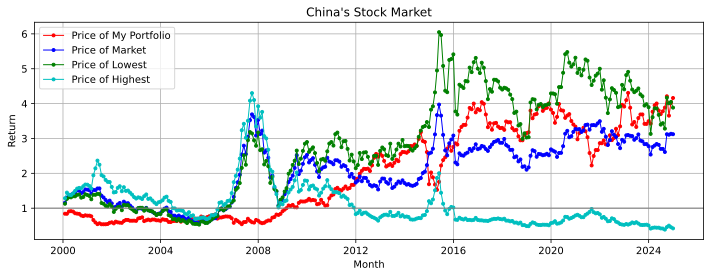

In [45]:
# 画图
fig = plt.figure(figsize=(12, 4))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPOR_pic)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPOR_pic) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPOR_pic) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPOR_pic) 

# plot legend
plt.legend(loc='upper left')

# 添加网格线
plt.grid(True)

# 添加横线 1
plt.axhline(y=1, color='gray', linewidth=1)

plt.show();

In [ ]:

# 公式：累计收益率_t = ∏(1 + 收益率_i) - 1，
MYPOR['cumulative_return'] = (1 + MYPOR['My_portfolio']).cumprod()
# 计算滚动最大值
# 计算到每个时间点的历史最高累积收益率
MYPOR['rolling_max'] = MYPOR['cumulative_return'].cummax()
# 计算回撤
# 回撤 = 当前累积收益率 / 历史最高累积收益率 - 1
# 正值表示当前处于历史高点，负值表示从历史高点下跌
MYPOR['drawdown'] = MYPOR['cumulative_return'] / MYPOR['rolling_max'] - 1
# 计算最大回撤
# 找出最大下跌幅度
max_drawdown = MYPOR['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: -0.5192818427532462


In [47]:
# 找出最大回撤的时间
max_drawdown_end = MYPOR['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = MYPOR.loc[:max_drawdown_end, 'cumulative_return'].idxmax() # 这部分代码选择了从数据开始到 max_drawdown_end 时间点之间的所有累积收益率

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.5192818427532462
Maximum Drawdown Start Date: 2014-08-31 00:00:00
Maximum Drawdown End Date: 2015-04-30 00:00:00


In [ ]:
# 构建完整的策略评估函数
def calculate_strategy_metrics(returns, benchmark_returns=None, rf_rate=0.03/12):
    """
    计算投资策略的全面评估指标
    
    Parameters:
    -----------
    returns : pd.Series
        策略收益率序列（月度）
    benchmark_returns : pd.Series, optional
        基准收益率序列（用于计算Information Ratio）
    rf_rate : float
        月度无风险利率，默认年化3%
    
    Returns:
    --------
    dict : 包含所有评估指标的字典
    """
    
    metrics = {}
    
    # 1. 收益指标
    # 累积收益率
    cumulative_return = (1 + returns).prod() - 1
    metrics['累积收益率 (Cumulative Return)'] = f"{cumulative_return:.2%}"
    
    # 年化收益率
    n_months = len(returns)
    n_years = n_months / 12
    annualized_return = (1 + cumulative_return) ** (1/n_years) - 1
    metrics['年化收益率 (Annualized Return)'] = f"{annualized_return:.2%}"
    
    # 月平均收益率
    avg_monthly_return = returns.mean()
    metrics['月平均收益率 (Average Monthly Return)'] = f"{avg_monthly_return:.2%}"
    
    # 2. 风险指标
    # 收益率标准差
    volatility = returns.std()
    metrics['月度波动率 (Monthly Volatility)'] = f"{volatility:.2%}"
    
    # 年化波动率
    annualized_volatility = volatility * np.sqrt(12)
    metrics['年化波动率 (Annualized Volatility)'] = f"{annualized_volatility:.2%}"
    
    # 最大回撤
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = cumulative / running_max - 1
    max_drawdown = drawdown.min()
    metrics['最大回撤 (Maximum Drawdown)'] = f"{max_drawdown:.2%}"
    
    # 下行风险（只考虑负收益的标准差）
    downside_returns = returns[returns < 0]
    downside_deviation = downside_returns.std()
    metrics['下行标准差 (Downside Deviation)'] = f"{downside_deviation:.2%}"
    
    # VaR (5% 分位数)
    var_95 = returns.quantile(0.05)
    metrics['VaR (95%)'] = f"{var_95:.2%}"
    
    # CVaR (条件VaR, 最差5%的平均值)
    cvar_95 = returns[returns <= var_95].mean()
    metrics['CVaR (95%)'] = f"{cvar_95:.2%}"
    
    # 3. 风险调整收益指标
    # 夏普比率
    excess_returns = returns - rf_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(12)
    metrics['夏普比率 (Sharpe Ratio)'] = f"{sharpe_ratio:.4f}"
    
    # 索提诺比率（使用下行风险）
    if downside_deviation > 0:
        sortino_ratio = excess_returns.mean() / downside_deviation * np.sqrt(12)
        metrics['索提诺比率 (Sortino Ratio)'] = f"{sortino_ratio:.4f}"
    else:
        metrics['索提诺比率 (Sortino Ratio)'] = "N/A"
    
    # 卡玛比率（年化收益率/最大回撤）
    if max_drawdown < 0:
        calmar_ratio = annualized_return / abs(max_drawdown)
        metrics['卡玛比率 (Calmar Ratio)'] = f"{calmar_ratio:.4f}"
    else:
        metrics['卡玛比率 (Calmar Ratio)'] = "N/A"
    
    # 信息比率（如果提供了基准）
    if benchmark_returns is not None:
        active_returns = returns - benchmark_returns
        tracking_error = active_returns.std()
        if tracking_error > 0:
            information_ratio = active_returns.mean() / tracking_error * np.sqrt(12)
            metrics['信息比率 (Information Ratio)'] = f"{information_ratio:.4f}"
            metrics['跟踪误差 (Tracking Error)'] = f"{tracking_error * np.sqrt(12):.2%}"
        else:
            metrics['信息比率 (Information Ratio)'] = "N/A"
            metrics['跟踪误差 (Tracking Error)'] = "N/A"
    
    # 4. 其他重要指标
    # 胜率
    win_rate = (returns > 0).sum() / len(returns)
    metrics['胜率 (Win Rate)'] = f"{win_rate:.2%}"
    
    # 盈亏比
    avg_gain = returns[returns > 0].mean()
    avg_loss = abs(returns[returns < 0].mean())
    if avg_loss > 0:
        profit_loss_ratio = avg_gain / avg_loss
        metrics['盈亏比 (Profit/Loss Ratio)'] = f"{profit_loss_ratio:.4f}"
    else:
        metrics['盈亏比 (Profit/Loss Ratio)'] = "N/A"
    
    # 最长回撤期
    # 找到所有创新高的时间点
    is_new_high = cumulative == running_max
    new_high_dates = cumulative[is_new_high].index
    
    # 计算每次创新高之间的间隔
    if len(new_high_dates) > 1:
        max_drawdown_duration = 0
        for i in range(len(new_high_dates) - 1):
            duration = (new_high_dates[i+1] - new_high_dates[i]).days / 30  # 转换为月
            max_drawdown_duration = max(max_drawdown_duration, duration)
        metrics['最长回撤期 (月) (Max Drawdown Duration)'] = f"{max_drawdown_duration:.1f}"
    else:
        metrics['最长回撤期 (月) (Max Drawdown Duration)'] = "N/A"
    
    # 最大回撤起止时间
    max_dd_end = drawdown.idxmin()
    max_dd_start = cumulative.loc[:max_dd_end].idxmax()
    metrics['最大回撤开始时间'] = max_dd_start.strftime('%Y-%m')
    metrics['最大回撤结束时间'] = max_dd_end.strftime('%Y-%m')
    
    return metrics

# 使用示例
print("=" * 80)
print("投资组合策略评估指标")
print("=" * 80)
portfolio_metrics = calculate_strategy_metrics(
    MYPOR['My_portfolio'], 
    benchmark_returns=MYPOR['MKT'],
    rf_rate=0.03/12  # 假设年化无风险利率为3%
)

for key, value in portfolio_metrics.items():
    print(f"{key:.<50} {value:>20}")
print("=" * 80)

In [49]:
# 构建完整的策略评估函数
def calculate_strategy_metrics(returns, benchmark_returns=None, rf_rate=0.03/12):
    """
    计算投资策略的全面评估指标
    
    Parameters:
    -----------
    returns : pd.Series
        策略收益率序列（月度）
    benchmark_returns : pd.Series, optional
        基准收益率序列（用于计算Information Ratio）
    rf_rate : float
        月度无风险利率，默认年化3%
    
    Returns:
    --------
    dict : 包含所有评估指标的字典
    """
    
    metrics = {}
    
    # 1. 收益指标
    # 累积收益率 - 策略从开始到结束的总收益
    cumulative_return = (1 + returns).prod() - 1
    metrics['累积收益率'] = f"{cumulative_return:.2%}"
    
    # 年化收益率 - 折算成年化水平
    n_months = len(returns)
    n_years = n_months / 12
    annualized_return = (1 + cumulative_return) ** (1/n_years) - 1
    metrics['年化收益率'] = f"{annualized_return:.2%}"
    
    # 月平均收益率
    avg_monthly_return = returns.mean()
    metrics['月平均收益率'] = f"{avg_monthly_return:.2%}"
    
    # 2. 风险指标
    # 收益率标准差 - 收益波动性
    volatility = returns.std()
    metrics['月度波动率'] = f"{volatility:.2%}"
    
    # 年化波动率
    annualized_volatility = volatility * np.sqrt(12)
    metrics['年化波动率'] = f"{annualized_volatility:.2%}"
    
    # 最大回撤 - 从历史高点下跌的最大幅度
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = cumulative / running_max - 1
    max_drawdown = drawdown.min()
    metrics['最大回撤'] = f"{max_drawdown:.2%}"
    
    # 下行标准差 - 只考虑负收益的波动
    downside_returns = returns[returns < 0]
    downside_deviation = downside_returns.std() if len(downside_returns) > 0 else 0
    metrics['下行标准差'] = f"{downside_deviation:.2%}"
    
    # 风险价值VaR - 5%概率下的最大损失
    var_95 = returns.quantile(0.05)
    metrics['VaR (95%)'] = f"{var_95:.2%}"
    
    # 条件风险价值CVaR - 最差5%情况下的平均损失
    cvar_95 = returns[returns <= var_95].mean()
    metrics['CVaR (95%)'] = f"{cvar_95:.2%}"
    
    # 3. 风险调整收益指标
    # 超额收益（相对无风险利率）
    excess_returns = returns - rf_rate
    
    # 夏普比率 - 单位总风险获得的超额收益
    if excess_returns.std() > 0:
        sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(12)
        metrics['夏普比率'] = f"{sharpe_ratio:.4f}"
    else:
        metrics['夏普比率'] = "N/A"
    
    # 索提诺比率 - 单位下行风险获得的超额收益
    if downside_deviation > 0:
        sortino_ratio = excess_returns.mean() / downside_deviation * np.sqrt(12)
        metrics['索提诺比率'] = f"{sortino_ratio:.4f}"
    else:
        metrics['索提诺比率'] = "N/A"
    
    # 卡玛比率 - 年化收益与最大回撤的比值
    if max_drawdown < 0:
        calmar_ratio = annualized_return / abs(max_drawdown)
        metrics['卡玛比率'] = f"{calmar_ratio:.4f}"
    else:
        metrics['卡玛比率'] = "N/A"
    
    # 信息比率 - 相对基准的超额收益能力
    if benchmark_returns is not None and len(returns) == len(benchmark_returns):
        active_returns = returns - benchmark_returns
        tracking_error = active_returns.std()
        if tracking_error > 0:
            information_ratio = active_returns.mean() / tracking_error * np.sqrt(12)
            metrics['信息比率'] = f"{information_ratio:.4f}"
            metrics['跟踪误差'] = f"{tracking_error * np.sqrt(12):.2%}"
        else:
            metrics['信息比率'] = "N/A"
            metrics['跟踪误差'] = "N/A"
    elif benchmark_returns is not None:
        metrics['信息比率'] = "数据长度不匹配"
        metrics['跟踪误差'] = "N/A"
    
    # 4. 其他重要指标
    # 胜率 - 正收益月份的比例
    win_rate = (returns > 0).mean()
    metrics['胜率'] = f"{win_rate:.2%}"
    
    # 盈亏比 - 平均盈利与平均亏损的比值
    winning_months = returns[returns > 0]
    losing_months = returns[returns < 0]
    if len(winning_months) > 0 and len(losing_months) > 0:
        avg_gain = winning_months.mean()
        avg_loss = abs(losing_months.mean())
        profit_loss_ratio = avg_gain / avg_loss
        metrics['盈亏比'] = f"{profit_loss_ratio:.4f}"
    else:
        metrics['盈亏比'] = "N/A"
    
    # 最长回撤期
    # 修正区域：移除了海象运算符，改用传统写法
    # 原代码：if len(new_high_dates := cumulative[is_new_high := cumulative == running_max].index) > 1:
    is_new_high = cumulative == running_max
    new_high_dates = cumulative[is_new_high].index
    
    if len(new_high_dates) > 1:
        max_drawdown_duration = 0
        for i in range(len(new_high_dates) - 1):
            duration = (new_high_dates[i+1] - new_high_dates[i]).days / 30
            max_drawdown_duration = max(max_drawdown_duration, duration)
        metrics['最长回撤期(月)'] = f"{max_drawdown_duration:.1f}"
    else:
        metrics['最长回撤期(月)'] = "N/A"
    
    # 最大回撤起止时间
    max_dd_end = drawdown.idxmin()
    max_dd_start = cumulative.loc[:max_dd_end].idxmax()
    metrics['最大回撤开始'] = max_dd_start.strftime('%Y-%m')
    metrics['最大回撤结束'] = max_dd_end.strftime('%Y-%m')
    
    # 5. 添加样本数量信息
    metrics['样本数(月)'] = str(n_months)
    metrics['时间范围'] = f"{returns.index[0].strftime('%Y-%m')} 至 {returns.index[-1].strftime('%Y-%m')}"
    
    return metrics

# 使用示例
print("=" * 80)
print("投资组合策略评估报告")
print("=" * 80)

# 检查数据是否存在
if 'My_portfolio' in MYPOR.columns:
    # 检查数据是否为空
    if len(MYPOR['My_portfolio'].dropna()) > 0:
        portfolio_metrics = calculate_strategy_metrics(
            MYPOR['My_portfolio'].dropna(),  # 移除NaN值
            benchmark_returns=MYPOR['MKT'].dropna() if 'MKT' in MYPOR.columns else None,
            rf_rate=0.03/12  # 年化3%无风险利率
        )
        
        print(f"策略名称: 动量反转策略 (P1 - Pmax)")
        print(f"评估时间: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("-" * 80)
        
        # 按类别输出指标
        categories = {
            '收益指标': ['累积收益率', '年化收益率', '月平均收益率'],
            '风险指标': ['月度波动率', '年化波动率', '最大回撤', '下行标准差', 'VaR (95%)', 'CVaR (95%)'],
            '风险调整收益': ['夏普比率', '索提诺比率', '卡玛比率', '信息比率', '跟踪误差'],
            '交易特征': ['胜率', '盈亏比', '最长回撤期(月)'],
            '回撤信息': ['最大回撤开始', '最大回撤结束'],
            '样本信息': ['样本数(月)', '时间范围']
        }
        
        for category, indicators in categories.items():
            print(f"\n{category}:")
            print("-" * 40)
            for indicator in indicators:
                if indicator in portfolio_metrics:
                    print(f"{indicator:<20} {portfolio_metrics[indicator]:>20}")
        
        print("=" * 80)
    else:
        print("错误: 'My_portfolio'列数据为空")
        print("请检查数据是否正确计算")
else:
    print("错误: MYPOR数据集中不存在'My_portfolio'列")
    print("可用列:", MYPOR.columns.tolist())

投资组合策略评估报告
策略名称: 动量反转策略 (P1 - Pmax)
评估时间: 2025-12-02 11:49:26
--------------------------------------------------------------------------------

收益指标:
----------------------------------------
累积收益率                             316.14%
年化收益率                               5.87%
月平均收益率                              0.71%

风险指标:
----------------------------------------
月度波动率                               6.82%
年化波动率                              23.62%
最大回撤                              -51.93%
下行标准差                               4.79%
VaR (95%)                          -9.92%
CVaR (95%)                        -14.76%

风险调整收益:
----------------------------------------
夏普比率                               0.2349
索提诺比率                              0.3346
卡玛比率                               0.1130
信息比率                               0.0149
跟踪误差                               35.81%

交易特征:
----------------------------------------
胜率                                 53.67%
盈亏比                              

In [ ]:
# 对比分析：我的组合 vs 市场 vs P1 vs Pmax
print("\n" + "=" * 80)
print("不同投资组合的对比分析")
print("=" * 80)

# 修正区域：列名大小写错误，变量名错误（我电脑报错了）

strategies = {
    '反转策略 (My Portfolio)': MYPOR['My_portfolio'],  
    '市场组合 (Market)': MYPOR['MKT'] if 'MKT' in MYPOR.columns else None,  
    '最低收益组 (P1)': MYPOR['P1'] if 'P1' in MYPOR.columns else None, 
    '最高收益组 (Pmax)': MYPOR['Pmax'] if 'Pmax' in MYPOR.columns else None
}

comparison_results = []

for name, returns in strategies.items():
    if returns is None or len(returns.dropna()) == 0:
        print(f"\n{name}: 数据不可用或为空")
        continue
        
    print(f"\n【{name}】")
    print("-" * 80)
    metrics = calculate_strategy_metrics(
        returns.dropna(),  # 移除NaN值
        benchmark_returns=MYPOR['MKT'].dropna() if 'MKT' in MYPOR.columns else None,
        rf_rate=0.03/12  
    )

    # 输出关键指标 - 修正指标名称
    # 原代码使用旧名称，需要更新为新名称
    key_metrics = [
        '累积收益率',  
        '年化收益率',  
        '年化波动率',  
        '最大回撤',   
        '夏普比率',  
        '索提诺比率',  
        '卡玛比率',    
        '胜率'         
    ]
    
    for key in key_metrics:
        if key in metrics:
            print(f"{key:.<20} {metrics[key]:>20}")
        else:
            print(f"{key:.<20} {'指标不可用':>20}")
    
    # 保存用于后续对比 - 修正字段名
    if all(k in metrics for k in ['年化收益率', '年化波动率', '夏普比率', '最大回撤']):
        comparison_results.append({
            '策略': name,
            '年化收益': metrics['年化收益率'],
            '年化波动': metrics['年化波动率'],
            '夏普比率': metrics['夏普比率'],
            '最大回撤': metrics['最大回撤']
        })
    else:
        print(f"警告：{name} 的某些关键指标缺失")

print("\n" + "=" * 80)

# 如果有对比结果，可以创建对比表格
if comparison_results:
    print("\n策略对比汇总：")
    print("=" * 80)
    comparison_df = pd.DataFrame(comparison_results)
    print(comparison_df.to_string(index=False))
    
    # 按夏普比率排序，找出最佳策略
    print("\n按夏普比率排序：")
    print("-" * 40)
    # 提取数值进行比较（需要去掉百分号等符号）
    sorted_results = sorted(
        comparison_results,
        key=lambda x: float(x['夏普比率'].rstrip('%').replace('N/A', '-999')) if x['夏普比率'] != 'N/A' else -999,
        reverse=True
    )
    for i, result in enumerate(sorted_results, 1):
        print(f"{i}. {result['策略']}: 夏普比率 = {result['夏普比率']}")


不同投资组合的对比分析

【反转策略 (My Portfolio)】
--------------------------------------------------------------------------------
累积收益率...............              316.14%
年化收益率...............                5.87%
年化波动率...............               23.62%
最大回撤................              -51.93%
夏普比率................               0.2349
索提诺比率...............               0.3346
卡玛比率................               0.1130
胜率..................               53.67%

【市场组合 (Market)】
--------------------------------------------------------------------------------
累积收益率...............              212.19%
年化收益率...............                4.66%
年化波动率...............               26.24%
最大回撤................              -70.74%
夏普比率................               0.1910
索提诺比率...............               0.2875
卡玛比率................               0.0659
胜率..................               53.67%

【最低收益组 (P1)】
--------------------------------------------------------------------------------
累积收益率.............

In [52]:
# 创建对比表格
comparison_df = pd.DataFrame(comparison_results)
print("\n策略对比汇总表:")
print(comparison_df.to_string(index=False))
print("\n")


策略对比汇总表:
                  策略    年化收益    年化波动     夏普比率     最大回撤
 反转策略 (My Portfolio)   5.87%  23.62%   0.2349  -51.93%
       市场组合 (Market)   4.66%  26.24%   0.1910  -70.74%
          最低收益组 (P1)   5.58%  31.20%   0.2318  -66.59%
        最高收益组 (Pmax)  -3.41%  31.94%  -0.0412  -91.05%




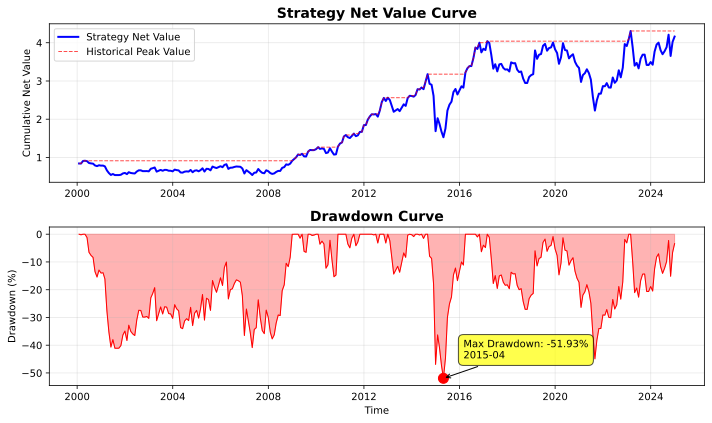

In [53]:
# 绘制完整的回撤图
cumulative_return = (1 + MYPOR['My_portfolio']).cumprod()
running_max = cumulative_return.cummax()
drawdown = (cumulative_return / running_max - 1) * 100  # 转换为百分比

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# 累积收益率和最大值
axes[0].plot(cumulative_return.index, cumulative_return, 'b-', label='Strategy Net Value', linewidth=2)
axes[0].plot(running_max.index, running_max, 'r--', label='Historical Peak Value', linewidth=1, alpha=0.7)
axes[0].set_title('Strategy Net Value Curve', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Net Value')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 回撤曲线
axes[1].fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
axes[1].plot(drawdown.index, drawdown, 'r-', linewidth=1)
axes[1].set_title('Drawdown Curve', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Drawdown (%)')
axes[1].set_xlabel('Time')
axes[1].grid(True, alpha=0.3)

# 标注最大回撤点
max_dd_value = drawdown.min()
max_dd_date = drawdown.idxmin()
axes[1].plot(max_dd_date, max_dd_value, 'ro', markersize=10)
axes[1].annotate(f'Max Drawdown: {max_dd_value:.2f}%\n{max_dd_date.strftime("%Y-%m")}',
                xy=(max_dd_date, max_dd_value),
                xytext=(20, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.tight_layout();
plt.show();

各策略年度收益率 (%):
        反转策略    市场组合   最低收益组   最高收益组
month                               
2000  -21.47   53.24   37.89   67.39
2001  -24.32  -25.73  -23.81   -3.83
2002    7.05  -20.56  -15.84  -20.71
2003   -0.01   -4.89   -5.91   -7.01
2004    4.13  -17.90  -25.85  -28.61
2005   16.20  -11.89    0.77  -14.94
2006  -24.68  113.02   96.11  142.35
2007   10.28  166.61  160.12  124.64
2008   42.76  -65.06  -58.76  -71.73
2009   33.31  104.97  121.50   61.01
2010   12.01   -8.65   -0.03  -13.50
2011   35.28  -24.94  -25.89  -46.37
2012   38.95    1.70   23.24  -11.17
2013    1.76   -2.48    5.01    2.29
2014  -35.29   49.26   19.77   59.43
2015   63.38   20.07   62.68  -15.15
2016   39.43  -12.69   -7.56  -35.03
2017  -14.03    6.82  -12.00    2.53
2018   -4.54  -26.84  -31.27  -28.37
2019   21.39   27.68   41.81   17.40
2020  -12.73   21.68   23.87   38.36
2021  -14.24    6.91   -5.93    4.22
2022   36.63  -16.82  -11.84  -36.64
2023  -10.72   -4.41  -11.59   -3.41
2024   19.06   12.36   -

Text(0.5, 0, '年份')

Text(0, 0.5, '收益率 (%)')

Text(0.5, 1.0, '各策略年度收益率对比')

[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022'),
 Text(23, 0, '2023'),
 Text(24, 0, '2024')]

d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-

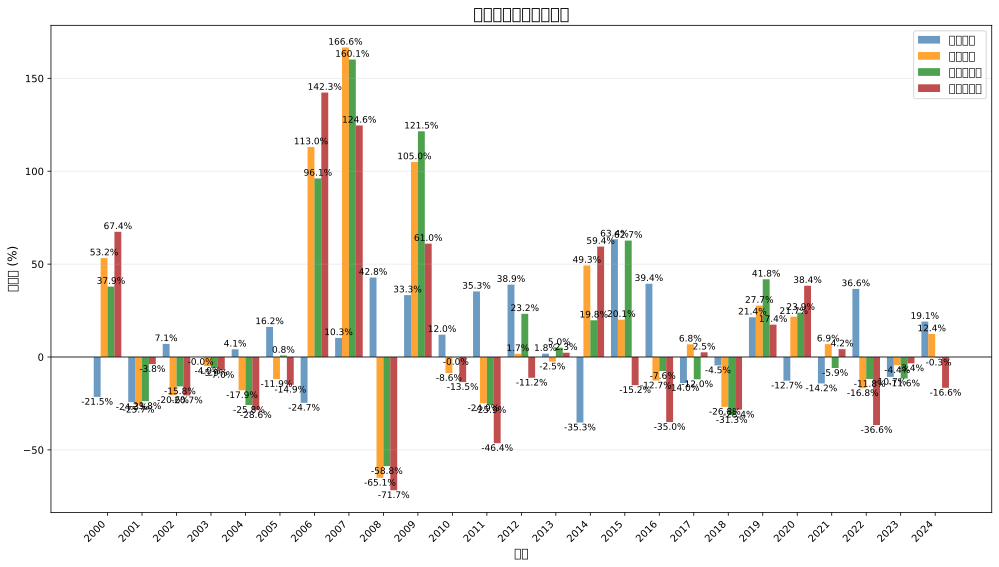


年度表现对比分析

各策略相对于市场的超额收益:
反转策略: 平均超额收益 = -4.87%, 胜率 = 60.00%
最低收益组: 平均超额收益 = 0.59%, 胜率 = 52.00%
最高收益组: 平均超额收益 = -7.00%, 胜率 = 28.00%

各策略年度收益率相关性:
        反转策略   市场组合  最低收益组  最高收益组
反转策略   1.000 -0.201  0.029 -0.482
市场组合  -0.201  1.000  0.956  0.932
最低收益组  0.029  0.956  1.000  0.839
最高收益组 -0.482  0.932  0.839  1.000

反转策略滚动年度表现（最近3年）:
最近滚动年度收益率: 19.06%
滚动年度收益率均值: 9.37%
滚动年度收益率最大值: 118.02%
滚动年度收益率最小值: -44.98%


In [54]:
# 年度表现分析
# 按年份分组计算各策略的年化收益率
annual_returns = MYPOR.groupby(MYPOR.index.year).agg({
    'My_portfolio': lambda x: (1 + x).prod() - 1,  # 反转策略年度收益率
    'MKT': lambda x: (1 + x).prod() - 1,           # 市场组合年度收益率
    'P1': lambda x: (1 + x).prod() - 1,            # 最低收益组（P1）年度收益率
    'Pmax': lambda x: (1 + x).prod() - 1           # 最高收益组（Pmax）年度收益率
})

# 重命名列使其更具可读性
annual_returns.columns = ['反转策略', '市场组合', '最低收益组', '最高收益组']
annual_returns = annual_returns * 100  # 转换为百分比格式

print("各策略年度收益率 (%):")
print(annual_returns.round(2))
print("\n反转策略年度表现统计:")
print(f"平均年度收益率: {annual_returns['反转策略'].mean():.2f}%")
print(f"年度收益率标准差: {annual_returns['反转策略'].std():.2f}%")
print(f"正收益年份数: {(annual_returns['反转策略'] > 0).sum()} / {len(annual_returns)}")
print(f"正收益年份比例: {(annual_returns['反转策略'] > 0).mean():.2%}")

# 绘制年度收益率对比图
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(annual_returns))
width = 0.2  # 柱状图宽度

# 绘制四个策略的柱状图
bars1 = ax.bar(x - 1.5*width, annual_returns['反转策略'], width, 
               label='反转策略', alpha=0.8, color='steelblue')
bars2 = ax.bar(x - 0.5*width, annual_returns['市场组合'], width, 
               label='市场组合', alpha=0.8, color='darkorange')
bars3 = ax.bar(x + 0.5*width, annual_returns['最低收益组'], width, 
               label='最低收益组', alpha=0.8, color='forestgreen')
bars4 = ax.bar(x + 1.5*width, annual_returns['最高收益组'], width, 
               label='最高收益组', alpha=0.8, color='firebrick')

# 设置图表属性
ax.set_xlabel('年份', fontsize=12)
ax.set_ylabel('收益率 (%)', fontsize=12)
ax.set_title('各策略年度收益率对比', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(annual_returns.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)  # 添加零线
ax.grid(True, alpha=0.3, axis='y')

# 在柱状图上添加数值标签
def add_value_labels(bars):
    """在柱状图上添加数值标签"""
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        y_offset = 0.5 if height >= 0 else -0.5
        ax.text(bar.get_x() + bar.get_width()/2., 
                height + y_offset,
                f'{height:.1f}%',
                ha='center', va=va, fontsize=9, rotation=0)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()

# 额外的统计分析
print("\n" + "=" * 80)
print("年度表现对比分析")
print("=" * 80)

# 计算各策略的相对表现
print("\n各策略相对于市场的超额收益:")
for strategy in ['反转策略', '最低收益组', '最高收益组']:
    excess_return = annual_returns[strategy] - annual_returns['市场组合']
    print(f"{strategy}: 平均超额收益 = {excess_return.mean():.2f}%, 胜率 = {(excess_return > 0).mean():.2%}")

print("\n各策略年度收益率相关性:")
correlation_matrix = annual_returns.corr()
print(correlation_matrix.round(3))

# 计算滚动年度表现
if len(MYPOR) >= 12:  # 确保有足够的数据
    print("\n反转策略滚动年度表现（最近3年）:")
    # 计算滚动12个月收益率
    rolling_annual = (1 + MYPOR['My_portfolio']).rolling(window=12).apply(lambda x: x.prod() - 1) * 100
    rolling_annual = rolling_annual.dropna()
    
    if len(rolling_annual) > 0:
        print(f"最近滚动年度收益率: {rolling_annual.iloc[-1]:.2f}%")
        print(f"滚动年度收益率均值: {rolling_annual.mean():.2f}%")
        print(f"滚动年度收益率最大值: {rolling_annual.max():.2f}%")
        print(f"滚动年度收益率最小值: {rolling_annual.min():.2f}%")


季度收益率 (%):
         Q1     Q2     Q3     Q4     年度
Year                                   
2000  -9.29  -5.89  -7.48  -0.58 -21.47
2001 -15.94 -14.23  -4.96  10.46 -24.32
2002  -0.18   6.26   1.60  -0.66   7.05
2003  15.88  -8.61  -0.11  -5.48  -0.01
2004   3.92  -5.09   7.17  -1.49   4.13
2005   7.90  -2.32   5.87   4.14  16.20
2006   6.74 -10.72   3.62 -23.72 -24.68
2007   1.57   2.81  -1.52   7.24  10.28
2008  -8.99  10.90  26.68  11.66  42.76
2009  18.09  -4.72  16.39   1.80  33.31
2010   1.63  -8.76  -4.82  26.91  12.01
2011  16.28  -1.47   1.01  16.89  35.28
2012  12.35   3.04  14.64   4.70  38.95
2013 -14.35   0.74   6.22  11.02   1.76
2014   6.80   0.04   5.06 -42.36 -35.29
2015  -0.62  32.69  21.83   1.70  63.38
2016  16.83   5.27  13.21   0.14  39.43
2017   3.96 -13.96   0.28  -4.16 -14.03
2018   4.80  -6.64  -8.84   7.02  -4.54
2019  13.49   9.54  -1.54  -0.84  21.39
2020  -5.45   4.91  -2.61  -9.67 -12.73
2021  -4.12  -5.22 -17.77  14.76 -14.24
2022  -1.22   4.30   4.87  2

[Text(0, 0, 'Q1'),
 Text(1, 0, 'Q2'),
 Text(2, 0, 'Q3'),
 Text(3, 0, 'Q4'),
 Text(4, 0, '年度')]

[Text(0, 0, '2000'),
 Text(0, 1, '2001'),
 Text(0, 2, '2002'),
 Text(0, 3, '2003'),
 Text(0, 4, '2004'),
 Text(0, 5, '2005'),
 Text(0, 6, '2006'),
 Text(0, 7, '2007'),
 Text(0, 8, '2008'),
 Text(0, 9, '2009'),
 Text(0, 10, '2010'),
 Text(0, 11, '2011'),
 Text(0, 12, '2012'),
 Text(0, 13, '2013'),
 Text(0, 14, '2014'),
 Text(0, 15, '2015'),
 Text(0, 16, '2016'),
 Text(0, 17, '2017'),
 Text(0, 18, '2018'),
 Text(0, 19, '2019'),
 Text(0, 20, '2020'),
 Text(0, 21, '2021'),
 Text(0, 22, '2022'),
 Text(0, 23, '2023'),
 Text(0, 24, '2024')]

Text(0, 0, '-9.3%')

Text(1, 0, '-5.9%')

Text(2, 0, '-7.5%')

Text(3, 0, '-0.6%')

Text(4, 0, '-21.5%')

Text(0, 1, '-15.9%')

Text(1, 1, '-14.2%')

Text(2, 1, '-5.0%')

Text(3, 1, '10.5%')

Text(4, 1, '-24.3%')

Text(0, 2, '-0.2%')

Text(1, 2, '6.3%')

Text(2, 2, '1.6%')

Text(3, 2, '-0.7%')

Text(4, 2, '7.1%')

Text(0, 3, '15.9%')

Text(1, 3, '-8.6%')

Text(2, 3, '-0.1%')

Text(3, 3, '-5.5%')

Text(4, 3, '-0.0%')

Text(0, 4, '3.9%')

Text(1, 4, '-5.1%')

Text(2, 4, '7.2%')

Text(3, 4, '-1.5%')

Text(4, 4, '4.1%')

Text(0, 5, '7.9%')

Text(1, 5, '-2.3%')

Text(2, 5, '5.9%')

Text(3, 5, '4.1%')

Text(4, 5, '16.2%')

Text(0, 6, '6.7%')

Text(1, 6, '-10.7%')

Text(2, 6, '3.6%')

Text(3, 6, '-23.7%')

Text(4, 6, '-24.7%')

Text(0, 7, '1.6%')

Text(1, 7, '2.8%')

Text(2, 7, '-1.5%')

Text(3, 7, '7.2%')

Text(4, 7, '10.3%')

Text(0, 8, '-9.0%')

Text(1, 8, '10.9%')

Text(2, 8, '26.7%')

Text(3, 8, '11.7%')

Text(4, 8, '42.8%')

Text(0, 9, '18.1%')

Text(1, 9, '-4.7%')

Text(2, 9, '16.4%')

Text(3, 9, '1.8%')

Text(4, 9, '33.3%')

Text(0, 10, '1.6%')

Text(1, 10, '-8.8%')

Text(2, 10, '-4.8%')

Text(3, 10, '26.9%')

Text(4, 10, '12.0%')

Text(0, 11, '16.3%')

Text(1, 11, '-1.5%')

Text(2, 11, '1.0%')

Text(3, 11, '16.9%')

Text(4, 11, '35.3%')

Text(0, 12, '12.3%')

Text(1, 12, '3.0%')

Text(2, 12, '14.6%')

Text(3, 12, '4.7%')

Text(4, 12, '38.9%')

Text(0, 13, '-14.3%')

Text(1, 13, '0.7%')

Text(2, 13, '6.2%')

Text(3, 13, '11.0%')

Text(4, 13, '1.8%')

Text(0, 14, '6.8%')

Text(1, 14, '0.0%')

Text(2, 14, '5.1%')

Text(3, 14, '-42.4%')

Text(4, 14, '-35.3%')

Text(0, 15, '-0.6%')

Text(1, 15, '32.7%')

Text(2, 15, '21.8%')

Text(3, 15, '1.7%')

Text(4, 15, '63.4%')

Text(0, 16, '16.8%')

Text(1, 16, '5.3%')

Text(2, 16, '13.2%')

Text(3, 16, '0.1%')

Text(4, 16, '39.4%')

Text(0, 17, '4.0%')

Text(1, 17, '-14.0%')

Text(2, 17, '0.3%')

Text(3, 17, '-4.2%')

Text(4, 17, '-14.0%')

Text(0, 18, '4.8%')

Text(1, 18, '-6.6%')

Text(2, 18, '-8.8%')

Text(3, 18, '7.0%')

Text(4, 18, '-4.5%')

Text(0, 19, '13.5%')

Text(1, 19, '9.5%')

Text(2, 19, '-1.5%')

Text(3, 19, '-0.8%')

Text(4, 19, '21.4%')

Text(0, 20, '-5.4%')

Text(1, 20, '4.9%')

Text(2, 20, '-2.6%')

Text(3, 20, '-9.7%')

Text(4, 20, '-12.7%')

Text(0, 21, '-4.1%')

Text(1, 21, '-5.2%')

Text(2, 21, '-17.8%')

Text(3, 21, '14.8%')

Text(4, 21, '-14.2%')

Text(0, 22, '-1.2%')

Text(1, 22, '4.3%')

Text(2, 22, '4.9%')

Text(3, 22, '26.5%')

Text(4, 22, '36.6%')

Text(0, 23, '-0.8%')

Text(1, 23, '-14.2%')

Text(2, 23, '10.8%')

Text(3, 23, '-5.3%')

Text(4, 23, '-10.7%')

Text(0, 24, '13.1%')

Text(1, 24, '-6.4%')

Text(2, 24, '13.8%')

Text(3, 24, '-1.2%')

Text(4, 24, '19.1%')

Text(0.5, 1.0, '反转策略季度收益率热力图')

Text(0.5, 0, '季度')

Text(0, 0.5, '年份')

d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\biancheng\lib\site-

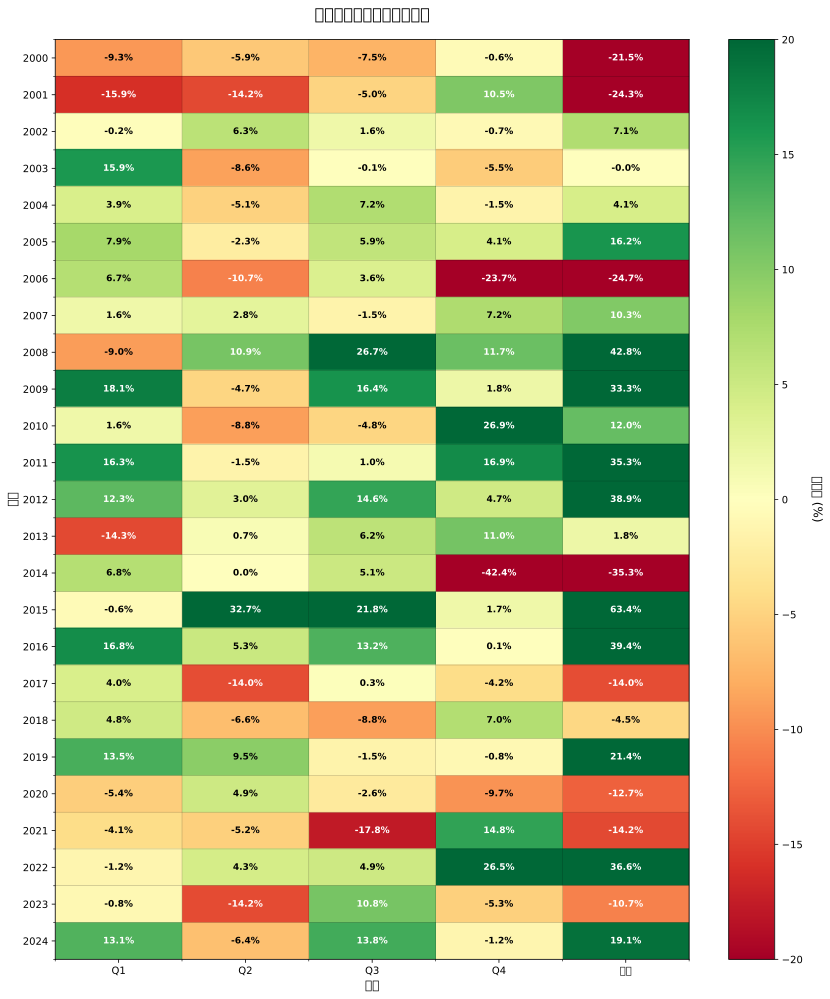


季度表现统计分析

各季度平均收益率 (%):
Q1: 3.29%
Q2: -1.11%
Q3: 4.14%
Q4: 1.98%

各季度胜率:
Q1: 60.00%
Q2: 44.00%
Q3: 64.00%
Q4: 56.00%

历史最佳季度收益率 (%):
Q1: 18.09%
Q2: 32.69%
Q3: 26.68%
Q4: 26.91%

历史最差季度收益率 (%):
Q1: -15.94%
Q2: -14.23%
Q3: -17.77%
Q4: -42.36%

季度收益率与年度收益率相关性:
Q1与年度收益率相关性: 0.347
Q2与年度收益率相关性: 0.674
Q3与年度收益率相关性: 0.647
Q4与年度收益率相关性: 0.486


In [56]:
# 季度表现热力图
MYPOR_copy = MYPOR.copy()
MYPOR_copy['Year'] = MYPOR_copy.index.year
MYPOR_copy['Quarter'] = MYPOR_copy.index.quarter

# 计算季度收益率
quarterly_returns = MYPOR_copy.groupby(['Year', 'Quarter'])['My_portfolio'].apply(
    lambda x: (1 + x).prod() - 1
) * 100  # 转换为百分比

# 转换为透视表
quarterly_pivot = quarterly_returns.reset_index().pivot(
    index='Year', 
    columns='Quarter', 
    values='My_portfolio'
)
quarterly_pivot.columns = ['Q1', 'Q2', 'Q3', 'Q4']

# 添加年度收益率列 - 修正：使用正确的列名
# 原代码：quarterly_pivot['Annual'] = annual_returns['Reversal Strategy']
quarterly_pivot['年度'] = annual_returns['反转策略']  # 使用中文列名

print("\n季度收益率 (%):")
print(quarterly_pivot.round(2))

# 绘制热力图
fig, ax = plt.subplots(figsize=(12, 14))
# 设置热力图的数值范围，-20%到20%
im = ax.imshow(quarterly_pivot.values, cmap='RdYlGn', aspect='auto', vmin=-20, vmax=20)

# 设置坐标轴
ax.set_xticks(np.arange(len(quarterly_pivot.columns)))
ax.set_yticks(np.arange(len(quarterly_pivot.index)))
ax.set_xticklabels(quarterly_pivot.columns)
ax.set_yticklabels(quarterly_pivot.index)

# 在每个格子中显示数值
for i in range(len(quarterly_pivot.index)):
    for j in range(len(quarterly_pivot.columns)):
        value = quarterly_pivot.iloc[i, j]
        if not pd.isna(value):  # 使用pd.isna检查NaN值
            # 根据数值大小调整文本颜色，使低值更易读
            text_color = 'black' if abs(value) < 10 else 'white'
            ax.text(j, i, f'{value:.1f}%',
                    ha="center", va="center", color=text_color, 
                    fontsize=9, fontweight='bold')

# 设置图表标题和标签
ax.set_title('反转策略季度收益率热力图', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('季度', fontsize=12)
ax.set_ylabel('年份', fontsize=12)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('收益率 (%)', rotation=270, labelpad=20, fontsize=12)

# 添加网格线
ax.set_xticks(np.arange(-0.5, len(quarterly_pivot.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(quarterly_pivot.index), 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

# 季度表现统计分析
print("\n" + "=" * 80)
print("季度表现统计分析")
print("=" * 80)

# 季度平均收益率
quarterly_avg = quarterly_pivot[['Q1', 'Q2', 'Q3', 'Q4']].mean()
print("\n各季度平均收益率 (%):")
for q, avg in quarterly_avg.items():
    print(f"{q}: {avg:.2f}%")

# 季度胜率
quarterly_win_rate = (quarterly_pivot[['Q1', 'Q2', 'Q3', 'Q4']] > 0).mean()
print("\n各季度胜率:")
for q, rate in quarterly_win_rate.items():
    print(f"{q}: {rate:.2%}")

# 最佳和最差季度
best_quarter = quarterly_pivot[['Q1', 'Q2', 'Q3', 'Q4']].max()
worst_quarter = quarterly_pivot[['Q1', 'Q2', 'Q3', 'Q4']].min()
print("\n历史最佳季度收益率 (%):")
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    print(f"{q}: {best_quarter[q]:.2f}%")
print("\n历史最差季度收益率 (%):")
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    print(f"{q}: {worst_quarter[q]:.2f}%")

# 年度-季度相关性
if '年度' in quarterly_pivot.columns:
    print("\n季度收益率与年度收益率相关性:")
    for q in ['Q1', 'Q2', 'Q3', 'Q4']:
        if q in quarterly_pivot.columns:
            corr = quarterly_pivot[q].corr(quarterly_pivot['年度'])
            print(f"{q}与年度收益率相关性: {corr:.3f}")